</a>
    <img src="logo_APL.png" width="400" align="center">
</a>

<h1>Estatística Básica em Python</h1>

<p><strong>Bem vindo!</strong> Neste notebook serão abordados como alguns dos conceitos de estátistica podem ser codificados em <strong>Python</strong>. Ao final, espera-se que você seja capaz de você usar algumas das ferramentas de análise estatística de dados com Python.</p>

<h2>Conteúdo:</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
        <li> Introdução </li>
        <li> Estimativas de Medidas de Tendência Central </li>     
        <li> Estimativas de Variabilidade </li>   
        <li> Percentis e Boxplots </li> 
        <li> Histogramas e Tabelas de Frequência </li>     
        <li> Correlação </li>   
        <li> Gráficos de Dispersão </li> 
</div>

<hr>

<h2>Introdução</h2>

Nesse notebook vamos codificar algumas das principais ferramentas estatísticas, como cálculo da média, desvio padrão, correlação, entre outros. 

Iniciamos carregando os pacotes `Python` necessários:

In [1]:
%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust

import seaborn as sns
import matplotlib.pylab as plt

## Estimativas de Medidas de Tendência Central

Vamos começar lendo o nosso dataset.

In [2]:
df = pd.read_csv("dados.csv")
print(df.head(8))

   condominio  quartos  suites  vagas  area    bairro   preco       pm2
0         350        1     0.0    1.0    21  Botafogo  340000  16190.48
1         800        1     0.0    1.0    64  Botafogo  770000  12031.25
2         674        1     0.0    1.0    61  Botafogo  600000   9836.07
3         700        1     1.0    1.0    70  Botafogo  700000  10000.00
4         440        1     0.0    1.0    44  Botafogo  515000  11704.55
5         917        1     1.0    1.0    60  Botafogo  630000  10500.00
6         850        1     1.0    1.0    65  Botafogo  740000  11384.62
7         350        1     1.0    1.0    43  Botafogo  570000  13255.81


Calcule a média, a média truncada e a mediana para o **Preço**. Para cálculo da média e mediana podemos usar, respectivamente, os métodos `mean` e` median` da biblioteca **Pandas**. Entretanto, a média truncada requer a função `trim_mean` da biblioteca **Scipy.Stats**.

Para facilitar a visualização, apresentamos apenas duas casas decimais usando o método `round()`.

In [3]:
print("Media = R$ {}.".format(round(df['preco'].mean(),2)))

Media = R$ 1229410.15.


In [4]:
print("Media Truncada = R$ {}.".format(round(trim_mean(df['preco'], 0.1),2)))

Media Truncada = R$ 1027752.39.


In [5]:
print("Mediana = R$ {}.".format(round(df['preco'].median(),2)))

Mediana = R$ 900000.0.


Para cálculo da média ponderada usamos a biblioteca **Numpy**. Nesse exemplo, vamos calcular o **Preço** ponderado pela **Área**.

In [6]:
print("Media do Preço ponderado pela Área = R$ {}.".format(round(np.average(df['preco'], weights=df['area']),2)))

Media do Preço ponderado pela Área = R$ 1656954.58.


# Estimativas de Variabilidade

Vamos continuar usando a coluna **Preço** do nosso dataset. Para cálculo do **Desvio Padrão**:

In [7]:
print("Desvio Padrão = R$ {}.".format(round(df['preco'].std(),2)))

Desvio Padrão = R$ 1155808.71.


O intervalo interquartil é calculado como a diferença do quantil 75% e 25%.

In [8]:
intervalo_interquartil = df['preco'].quantile(0.75) - df['preco'].quantile(0.25)
print("Intervalo interquartil entre 75% e 25% = R$ {}.".format(round(intervalo_interquartil,2)))

Intervalo interquartil entre 75% e 25% = R$ 990000.0.


O desvio absoluto da mediana da mediana pode ser calculado com um método da biblioteca `statsmodels`.

In [9]:
print("Desvio Padrão = R$ {}.".format(round(robust.scale.mad(df['preco']),2)))

Desvio Padrão = R$ 607866.91.


## Percentis e Boxplots
A biblioteca **Pandas** disponibiliza o método `quantile`, de acordo com:

In [10]:
print(df['preco'].quantile([0.05, 0.25, 0.5, 0.75, 0.95]))

0.05     340000.0
0.25     560000.0
0.50     900000.0
0.75    1550000.0
0.95    3000000.0
Name: preco, dtype: float64


A biblioteca **Pandas**fornece diversos gráficos para análise exploratória básica; um deles são _boxplots_. Nesse exemplo, vamos analisar a distribuição dos valores de _Preço/m2_:

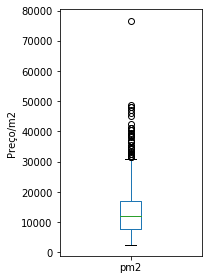

In [11]:
ax = (df['pm2']).plot.box(figsize=(3, 4))
ax.set_ylabel('Preço/m2')

plt.tight_layout()
plt.show()

Como vimos na aula sobre **Pandas**, agrupar os dados se baseando em certos critérios, por meio do comando `.groupby()`, pode ser usado para resolver diversos problemas. Abaixo agrupamos o nosso DataFrame pelos valores da coluna `"bairro"`, e em seguida aplicamos o `.mean()` para termos informação das médias agrupadas pelos valores da coluna bairros. 

In [12]:
df.groupby("bairro").mean()

,condominio,quartos,suites,vagas,area,preco,pm2
bairro,,,,,,,
Botafogo,914.475570,2.107492,1.048860,1.159609,83.837134,1.010614e+06,12034.486189
Copacabana,991.861272,2.101156,1.034682,1.080925,101.855491,1.216344e+06,11965.298699
Grajaú,619.940928,2.097046,0.970464,1.130802,79.949367,4.788869e+05,6145.624473
Gávea,985.234146,2.058537,1.029268,1.200000,88.497561,1.454571e+06,16511.582780
Ipanema,1357.120996,2.181495,1.192171,1.220641,100.615658,2.033096e+06,19738.407794
Leblon,1260.010714,2.207143,1.064286,1.164286,91.832143,1.946193e+06,20761.351036
Tijuca,681.175953,2.131965,0.944282,1.143695,81.457478,5.750780e+05,7149.804985


Os gráficos boxplot da biblioteca **Pandas** não se restringem a apresentar uma única variável. No exemplo a seguir, os dados relativos ao Preço foram agrupados por uma coluna diferente, o bairro.

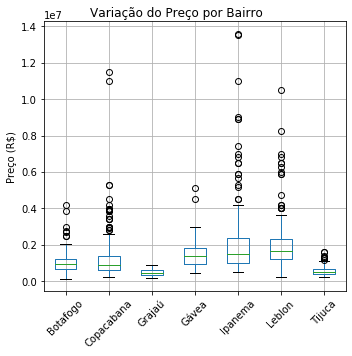

In [13]:
ax = df.boxplot(by='bairro', column='preco',
                           figsize=(5, 5))
ax.set_xlabel('')
ax.set_ylabel('Preço (R$)')
ax.get_figure().gca().set_title("")
plt.suptitle('Variação do Preço por Bairro')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Histogramas e Tabelas de Frequência
O método `cut` do **Pandas**divide o conjunto de dados em faixas de valores (ou seja, _bins_). No exemplo a seguir, foram utilziadas faixas de mesma largura. O método `value_counts` retorna uma tabela de frequência representando o número de ocorrências dentro de cada faixa de valores. Usaremos a feature que representa o custo (em R$) do condomínio.

In [14]:
binnedPopulation = pd.cut(df['condominio'], 10)
print(binnedPopulation.value_counts())

(708.0, 1415.0]     839
(-6.07, 708.0]      831
(1415.0, 2122.0]    236
(2122.0, 2829.0]     51
(2829.0, 3536.0]     16
(3536.0, 4243.0]     15
(4243.0, 4950.0]      4
(4950.0, 5657.0]      3
(6364.0, 7071.0]      2
(5657.0, 6364.0]      0
Name: condominio, dtype: int64


**Interpretando esse resultado**: existem 839 residências em que o condomínio custa entre 708 e 1415 reais. Em 831 residências, esse custo é menor que 708 reais. Em 236, esse custo varia entre 1.415 e 2.122 reais. E assim sucessivamente...

**Pandas** também disponibiliza gráficos de histograma para análise exploratória de dados. No exemplo a seguir vemos o histograma para a _feature_ Preço/m2.

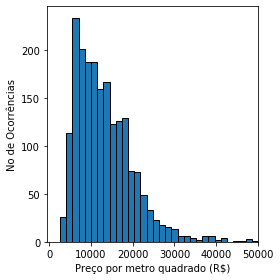

In [15]:
ax = (df['pm2']).plot.hist(bins=50, edgecolor='black', figsize=(4, 4))
ax.set_xlabel('Preço por metro quadrado (R$)')
ax.set_ylabel('No de Ocorrências')
ax.set_xlim(-500, 50000)

plt.tight_layout()
plt.show()

### Estimativa da Densidade (versão suavizada do histrograma)
O gráfico de _densidade_ é uma alternativa aos histogramas, uma vez que pode fornecer mais insights acerca da distribuição dos  dados.

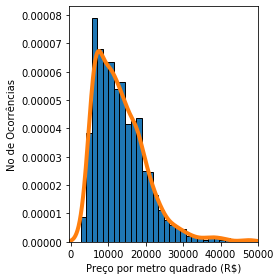

In [16]:
ax = (df['pm2']).plot.hist(density=True, bins=50, edgecolor='black', figsize=(4, 4))
df['pm2'].plot.density(ax=ax, linewidth=4)
ax.set_xlabel('Preço por metro quadrado (R$)')
ax.set_ylabel('No de Ocorrências')
ax.set_xlim(-500, 50000)
plt.tight_layout()
plt.show()

### Visualização da relação entre três variáveis: 
Bairro, numero de quartos e Preço/m2

In [17]:
df_1 = df[['bairro','pm2','quartos']]
grouped_test1 = df_1.groupby(['bairro','quartos'],as_index=False).mean()

grouped_test1.round(2).head()

,bairro,quartos,pm2
0,Botafogo,1,11848.31
1,Botafogo,2,11958.49
2,Botafogo,3,12238.45
3,Copacabana,1,12272.21
4,Copacabana,2,11867.23


Na Tabela abaixo temos o valor médio do Preço/m2 em relação tanto ao bairro quanto ao numero de quartos

In [18]:
grouped_pivot = grouped_test1.pivot(index='bairro',columns='quartos')
grouped_pivot.round(2)

pm2                    
quartos            1         2         3
bairro                                  
Botafogo    11848.31  11958.49  12238.45
Copacabana  12272.21  11867.23  11813.39
Grajaú       6382.26   6314.02   5766.53
Gávea       15972.82  16530.34  16935.17
Ipanema     20973.63  19363.32  19277.61
Leblon      21608.93  19532.54  21294.98
Tijuca       7429.68   7149.29   6968.85

Pela análise da Tabela anterior, pode-se verificar a média do _preço/m2_  em função do _bairro_ e do _número de quartos_

# Visualizando variáveis categóricas

**Pandas**  oferece suporte a gráficos de barras para exibir variáveis categóricas.  No nosso exemplo, vamos mostrar o número de quartos.

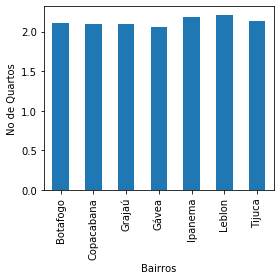

In [19]:
# Grafico com o preço médio do preço/m2 em cada bairro
ax = df[['bairro','quartos']].groupby("bairro").mean().plot.bar(figsize=(4, 4), legend=False)
ax.set_xlabel('Bairros')
ax.set_ylabel('No de Quartos')

plt.tight_layout()
plt.show()

# Correlação vs Causalidade
**Correlação**: uma medida da extensão da interdependência entre as variáveis.

**Causalidade**: a relação entre causa e efeito entre duas variáveis.

É importante saber a diferença entre os dois e que a **correlação não implica causalidade**. Determinar a correlação é muito mais simples do que determinar a causalidade, pois a causalidade pode exigir experimentação independente.

Calculando a **correlação** entre as features do nosso dataset.

In [20]:
df.corr().round(2)

,condominio,quartos,suites,vagas,area,preco,pm2
condominio,1.00,0.42,0.31,0.36,0.65,0.74,0.49
quartos,0.42,1.00,0.27,0.35,0.68,0.41,0.01
suites,0.31,0.27,1.00,0.26,0.32,0.31,0.17
vagas,0.36,0.35,0.26,1.00,0.44,0.39,0.13
area,0.65,0.68,0.32,0.44,1.00,0.72,0.11
preco,0.74,0.41,0.31,0.39,0.72,1.00,0.68
pm2,0.49,0.01,0.17,0.13,0.11,0.68,1.00


A visualização por meio de uma figura pode facilitar nossa análise. Ovserve que as tonalidades de diferentes cores auxiliam na identificação do valor da **correlação**. A discussão de **causalidade** está fora do noso escopo neste momento.

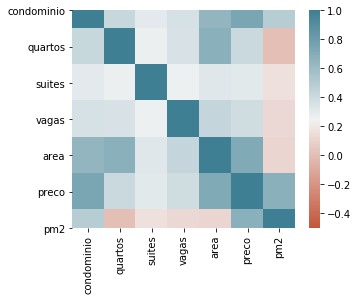

In [21]:
fig, ax = plt.subplots(figsize=(5, 4))
#ax = sns.heatmap(etfs.corr(), vmin=-1, vmax=1, 
#                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
#                 ax=ax)
ax = sns.heatmap(df.corr(), vmin=-.5, vmax=1, 
                 cmap=sns.diverging_palette(20, 220, as_cmap=True),
                 ax=ax)

#plt.tight_layout()
plt.show()

## Gráficos de Dispersão
Gráficos de dispersão  são fornecidos pela biblioteca `Pandas`. No nosso exemplo, vamos ver a relação entre o Preço e o Preço/m2

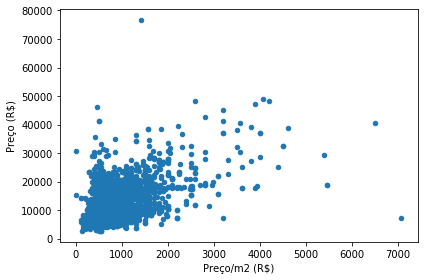

In [24]:
ax = df.plot.scatter(x='condominio', y='pm2')
ax.set_xlabel('Preço/m2 (R$)')
ax.set_ylabel('Preço (R$)')

plt.tight_layout()
plt.show()